In [100]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
datumy = data["DATE"]
srazky = data["PRCP"]

In [101]:
srazky = srazky.set_axis(datumy)
srazky = srazky.reset_index(drop=True)
srazky

0         0.0
1         0.0
2         0.0
3        19.0
4         0.0
         ... 
67829     0.0
67830     0.0
67831     0.5
67832     0.0
67833     0.0
Name: PRCP, Length: 67834, dtype: float64

toto je můj komentář

In [102]:
srazky.loc[10000]
srazky.iloc[10000]

srazky.at[0]
srazky.iat[0]

0.0

In [103]:
srazky.iloc[3:5]

3    19.0
4     0.0
Name: PRCP, dtype: float64

In [104]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
datumy = data["DATE"]
srazky = data["PRCP"]

srazky_vyplneno = srazky.dropna()

srazky_nevyplneno = srazky[srazky.isna()]
srazky_nevyplneno.to_csv("nevyplneno.csv")

In [105]:
srazky = srazky.set_axis(datumy)
srazky=srazky.filter(like="2020")
srazky.index = pd.to_datetime(srazky.index)
srazky = srazky.loc[srazky.index.month == 1]
srazky



DATE
2020-01-01     0.0
2020-01-02     0.0
2020-01-03     3.8
2020-01-04    10.1
2020-01-05     0.1
              ... 
2020-01-27     0.0
2020-01-28     0.0
2020-01-29     1.0
2020-01-30     0.0
2020-01-31     0.5
Name: PRCP, Length: 279, dtype: float64

In [106]:
datum = ["1.5.1945"]
datum_series = pd.Series(datum)
datum_series = pd.to_datetime(datum_series,format="%d.%m.%Y")
datum_series


0   1945-05-01
dtype: datetime64[ns]

In [110]:
import pandas as pd

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
datumy = data["DATE"]
srazky = data["PRCP"]

pocet_nan = srazky.isnull().sum()
print(pocet_nan)

prumer = srazky.mean()
srazky = srazky[srazky>prumer]
print(prumer)
srazky.value_counts()

11351
2.3900536444593947


PRCP
2.8      478
3.0      408
2.5      333
3.3      332
4.1      311
        ... 
119.9      1
140.0      1
43.5       1
39.6       1
47.5       1
Name: count, Length: 476, dtype: int64

<Axes: xlabel='DATE'>

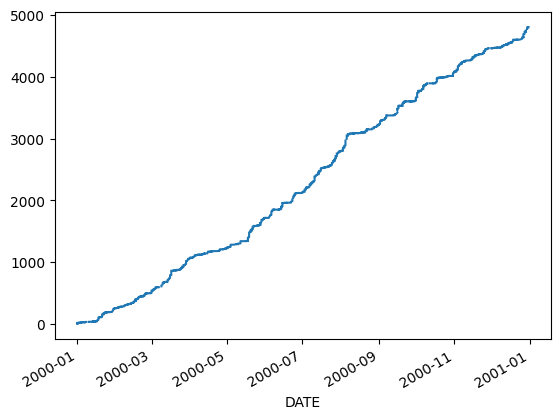

In [113]:
'''
Pro rok 2000 graf s kumulativní sumou srážek

'''

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
datumy = data["DATE"]
srazky = data["PRCP"]


srazky = srazky.set_axis(pd.to_datetime(datumy))
srazky = srazky[srazky.index.year==2000]
srazky = srazky.sort_index()
srazky_cumm = srazky.cumsum()

srazky_cumm.plot()


<Axes: xlabel='DATE'>

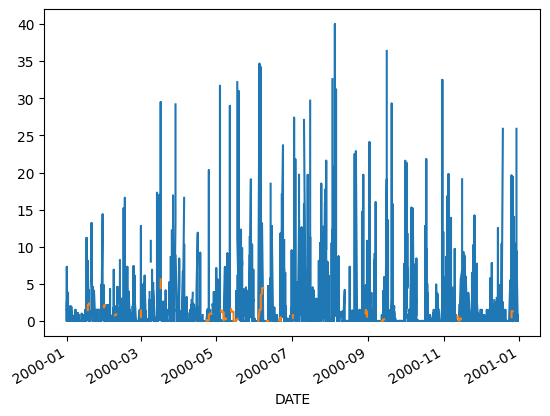

In [118]:
'''
Pro rok 2000 graf s kumulativní sumou srážek

'''

# Načtení dat z CSV souboru
data = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/refs/heads/main/pydata_data.csv',sep=";")
datumy = data["DATE"]
srazky = data["PRCP"]


srazky = srazky.set_axis(pd.to_datetime(datumy))
srazky = srazky[srazky.index.year==2000]
srazky = srazky.sort_index()
srazky_roll = srazky.rolling(window=30,min_periods=30).mean()

srazky.plot()
srazky_roll.plot()